<a href="https://colab.research.google.com/github/RupeshSharma14/ML-Algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression

In [2]:
# Loading the data

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ex2data1.txt", header = None, names = ["Exam 1 Score", "Exam 2 Score", "Admission Decision"])

m = len(data) # num of training examples 
x0 = np.ones((m, 1))  # x0, vector of 1s
X = np.c_[x0, np.array(data[["Exam 1 Score", "Exam 2 Score"]])] 
y = np.array(data["Admission Decision"]).reshape(m, 1)
m, n = X.shape

data.head()

,Exam 1 Score,Exam 2 Score,Admission Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


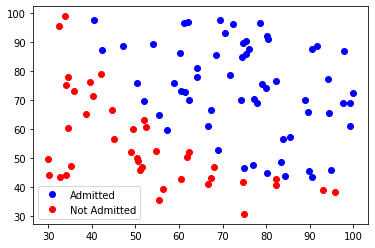

In [3]:
# Visualization of data

pos = np.where(y == 1)[0]  # indices of positive example
neg = np.where(y == 0)[0] # indices of negative example

plt.plot(X[pos, 1], X[pos, 2], "bo", label = "Admitted")
plt.plot(X[neg, 1], X[neg, 2], "ro", label = "Not Admitted")
plt.legend();

In [4]:
# Sigmoid function

def sigmoid(z):
  return 1/(1+np.exp(-z))

In [5]:
def cost( theta, X, y):   # To use conjugate gradient, the order of parameters will be theta, X, y
    m = len(y)
    hx = sigmoid(X @ theta)
    return 1/m * (-y.T @ np.log(hx) - (1 - y).T @ np.log(1 - hx))

In [6]:
# Z-score scaling

def normalize(X):
    X_ = X.transpose()
    mu = np.zeros(len(X_))
    sigma = np.zeros(len(X_))
    for i, feature in enumerate(X_):
        if i == 0: 
            continue
        mu_ = np.mean(feature)
        sigma_ = np.std(feature)
        mu[i] = mu_
        sigma[i] = sigma_
        X[:, i] = (feature - mu_) / sigma_
        
    return X, mu, sigma

X, mu, sigma = normalize(X)
X[0:5]

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794]])

In [7]:
# Gradient descent

def gradient(X, y, theta, alpha, iterations):
  m = len(y)
  
  J_history = np.zeros((iterations, 1))
  
  for iter in range(iterations):
    hx = sigmoid(X @ theta)
    theta = theta - (alpha / m) * X.T @ (hx - y)
    J_history[iter] = cost(theta, X, y)
  return theta, J_history

alpha = 0.03
init_theta = np.zeros((3, 1))
iterations = 3000
theta, J_history = gradient(X, y, init_theta, alpha, iterations)
theta

array([[1.23119384],
       [2.96480947],
       [2.73215096]])

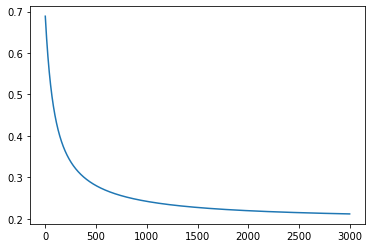

In [8]:
plt.plot(J_history);

In [9]:
# Prediction

X_pred = np.array([1, (45 - mu[1]) / sigma[1], (85 - mu[2]) / sigma[2]])
prob = sigmoid(X_pred @ theta)
print(f"For a student with scores 45 and 85, we predict an admission probability of {np.round(prob[0], 2)}")

For a student with scores 45 and 85, we predict an admission probability of 0.7


In [10]:
# Training Accuracy 

hx = np.zeros((m ,1))
for (iter, example) in enumerate(X):
  prob = sigmoid(np.array(example @ theta))
  hx[iter] = 1 if prob >= 0.5 else 0

print(f"Training Accuracy: {np.mean(hx == y.reshape((m, 1))) * 100}%")

Training Accuracy: 89.0%


In [11]:
# Logistic regression using conjugate gradient (Advanced Optimisation)

def cost_derivative(theta, X, y):  # To use conjugate gradient, the order of parameters will be theta, X, y
  m = len(y)
  n = len(theta)
  hx = sigmoid(X @ theta)
  derivative = (1 / m) * X.T @ (hx - y)
  return derivative

In [12]:
initial_theta = np.zeros((n))
y = y.reshape(m)
print('Cost: \n{}\n'.format(cost(initial_theta, X, y)))
print('Gradient: \n{}'.format(cost_derivative(initial_theta, X, y)))

Cost: 
0.6931471805599453

Gradient: 
[-0.1        -0.28122914 -0.25098615]


In [13]:
# Learning theta using conjugate gradient

from scipy.optimize import minimize

init_theta = np.zeros((3, 1))
result = minimize(cost, init_theta, args = (X, y),
                  method = "CG", jac = cost_derivative, 
                  options = {"maxiter": 400, "disp": 1})

theta = result.x
print("Conjugate gradient found the following values for theta: {}".format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 13
         Function evaluations: 42
         Gradient evaluations: 42
Conjugate gradient found the following values for theta: [1.71831941 3.99235396 3.72482497]


In [14]:
# Prediction

X_pred = np.array([1, (45 - mu[1]) / sigma[1], (85 - mu[2]) / sigma[2]])
prob = sigmoid(X_pred @ theta)
print(f"For a student with scores 45 and 85, we predict an admission probability of {np.round(prob, 2)}")

For a student with scores 45 and 85, we predict an admission probability of 0.78


In [15]:
# Training Accuracy

hx = np.zeros((m, 1))
for (iter, example) in enumerate(X):
  prob = sigmoid(np.array(example @ theta))
  hx[iter] = 1 if prob >= 0.5 else 0

print(f"Training Accuracy: {np.mean(hx == y.reshape((m, 1))) * 100}%")

Training Accuracy: 89.0%


In [16]:
# Using scikit-learn

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
X_pred = np.array([[1, (45 - mu[1]) / sigma[1], (85 - mu[2]) / sigma[2]]])
prob = log_reg.predict(X_pred)
print(f"For a student with scores 45 and 85, our prediction is  {np.round(prob[0], 2)}")

For a student with scores 45 and 85, our prediction is  1


In [18]:
# Training accuracy

from sklearn.metrics import accuracy_score

score = accuracy_score(y, log_reg.predict(X))
print(f"Training Accuracy: {score * 100}%")

Training Accuracy: 89.0%
